In [35]:
# Tutorial here:
#https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb

In [1]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates
%matplotlib inline

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [10]:
eth_df =pd.read_csv("./data/eth.csv", index_col='Date', parse_dates=True)
eth_df = eth_df.iloc[::-1]
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10


In [53]:
eth_df['Short SMA'] = eth_df['Close'].rolling(window=80).mean()

In [54]:
eth_df['Long SMA'] = eth_df['Close'].rolling(window=200).mean()

In [55]:
# Bollinger Bands 34 days (vs 20) with 2.5 sigma (vs 2)

# Close Price 34 Day MA
eth_df['Close 34 MA'] = eth_df['Close'].rolling(window=34).mean()
# Upper Band = 34 Day MA + 2 * Std Dev(34 Days)
eth_df['Upper'] = eth_df['Close 34 MA'] + 2.5 * (eth_df['Close'].rolling(34).std())
# Lower Band = 34 Day MA - 2 * Std Dev (20 Days)
eth_df['Lower'] = eth_df['Close 34 MA'] - 2.5 * (eth_df['Close'].rolling(34).std())

In [56]:
# RSI 

eth_df['move'] = eth_df['Close'] - eth_df['Close'].shift(1)
eth_df['up'] = np.where(eth_df['move'] > 0, eth_df['move'], 0)
eth_df['down'] = np.where(eth_df['move'] < 0, eth_df['move'],0)
eth_df['average_gain'] = eth_df['up'].rolling(14).mean()
eth_df['average_loss'] = eth_df['down'].abs().rolling(14).mean()
eth_df['RS'] = 100.0 - ( 100.0 / (1 + eth_df['average_gain'] / eth_df['average_loss'] ) )


In [57]:
# MACD

eth_df['exp12'] = eth_df['Close'].ewm(span=12, adjust=False).mean()
eth_df['exp26'] = eth_df['Close'].ewm(span=26,adjust=False).mean()
eth_df['macd'] = eth_df['exp12'] = eth_df['exp26']
eth_df['signal'] = eth_df['macd'].ewm(span=9, adjust=False).mean()
eth_df['histogram'] = eth_df['macd']- eth_df['signal']

In [58]:
eth_df.dropna(inplace=True)

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/mplfinance/_arg_validators.py:93: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


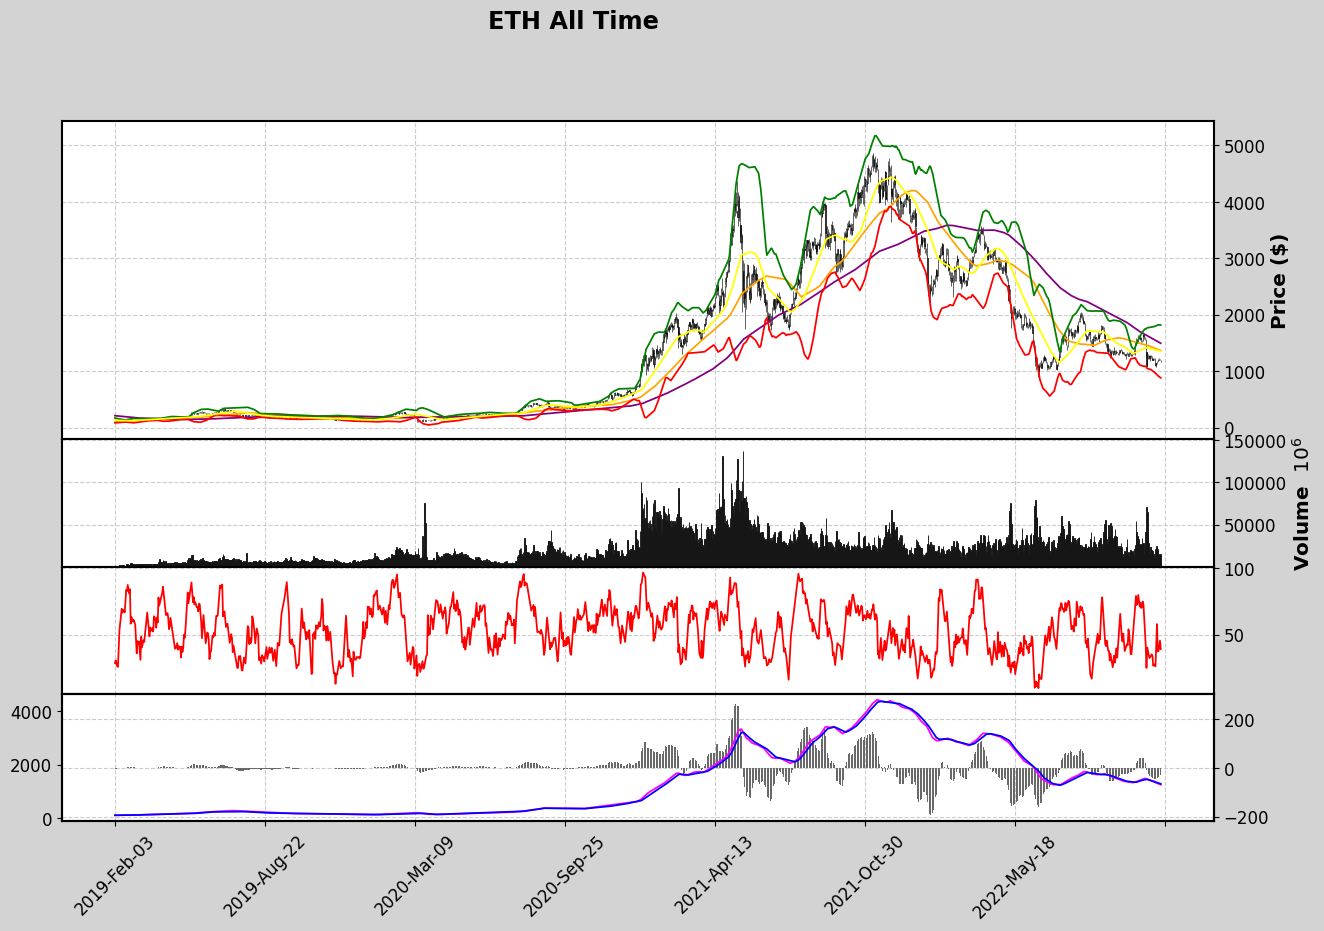

In [59]:

apd = [
        # MA's
        mpf.make_addplot(eth_df['Short SMA'],color='orange'),
        mpf.make_addplot(eth_df['Long SMA'], color='purple'),
        # BB's
        mpf.make_addplot(eth_df['Upper'],color='green'),
        mpf.make_addplot(eth_df['Lower'], color='red'),
        mpf.make_addplot(eth_df['Close 34 MA'], color='yellow'),
        mpf.make_addplot(eth_df['RS'], color='red',panel=2),
        # MACD
        mpf.make_addplot(eth_df['histogram'],type='bar',width=0.7,panel=3,color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(eth_df['macd'],panel=3,color='fuchsia',secondary_y=True),
        mpf.make_addplot(eth_df['signal'],panel=3,color='b',secondary_y=True),
    
]

mpf.plot(eth_df[['Open','High','Low','Close','Volume']], 
         type='candle', 
         title='ETH All Time', 
         style=mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'}),
         ylabel='Price ($)',
         volume=True, 
         addplot=apd,
         figsize=(16,10));


In [36]:
import matplotlib.animation as animation

In [37]:
eth_df_2 =pd.read_csv("./data/eth.csv", index_col='Date', parse_dates=True)
eth_df_2 = eth_df_2.iloc[::-1]
eth_df_2.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10


In [38]:
eth_df_2.shape

(1826, 6)

In [39]:
df = eth_df_2.loc['2020-07-01':'2022-11-01',:]

In [40]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-07-01,225.631318,232.050798,224.546005,230.572227,4.919655e+09,2.545442e+10
2020-07-02,230.786832,231.746831,224.251674,226.937223,5.302576e+09,2.549923e+10
2020-07-03,226.881027,227.882144,225.004768,225.177161,4.918815e+09,2.530373e+10
2020-07-04,225.209757,230.131070,225.137285,228.977045,4.053795e+09,2.530760e+10
2020-07-05,229.083181,229.572383,224.072722,227.704449,4.223751e+09,2.527445e+10


<Mpf_Figure size 700x800 with 0 Axes>

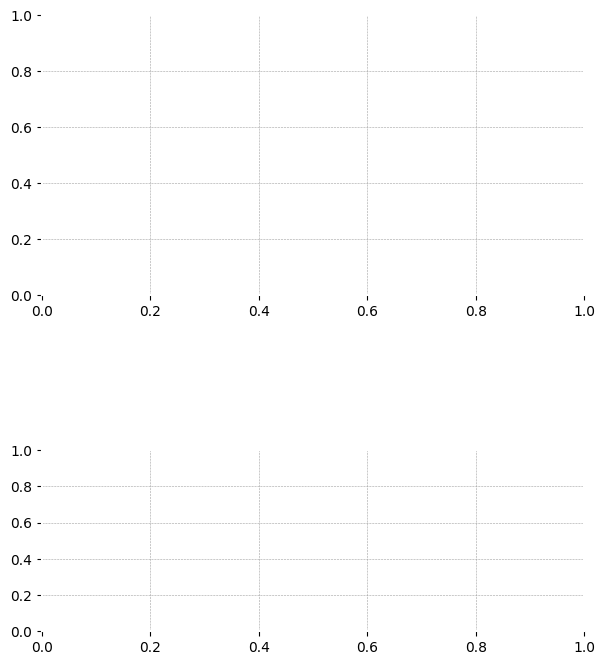

In [51]:
fig = mpf.figure(style='charles',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(3,1,3)
def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(20+ival)]
    ax1.clear()
    ax2.clear()
    mpf.plot(data,ax=ax1,volume=ax2,type='candle')



In [52]:
ani = animation.FuncAnimation(fig, animate, interval=250)
mpf.show()